# Matichon Topic Classification: XGBoost

* Author: Natchanon Pollertlam
* Date: 2023-11-27

# Table of Contents

1. a


---

## Import Modules

---

In [1]:
# import data preprocessing libraries
import pandas as pd
import numpy as np
from collections import Counter
import pickle

from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

# visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


# XGBoost libraries
from xgboost import XGBClassifier
from xgboost import plot_importance

In [2]:
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# matplotlib font
from matplotlib import font_manager

font_path = '../assets/font-lasagna/MN LASAGNA Bold.ttf'  # font path goes here
font_manager.fontManager.addfont(font_path)
prop = font_manager.FontProperties(fname=font_path)

plt.rcParams['font.family'] = prop.get_name()

## Load Data

---

In [5]:
df = pd.read_json('../data/matichon_cleaned.json')
df

,headline,article,date,category,url,id,tokenized_headline,tokenized_article,tokenized_text,cleaned_tokenized_headline,cleaned_tokenized_article,cleaned_tokenized_text,num_tokens
0,ซาอุฯจ่อเปิดไฟเขียวให้สิทธิหญิงม่าย-หย่าร้างปก...,(2 ธ.ค.58) หนังสือพิมพ์อัล ริยาดของทางการซาอุด...,2015-12-04 03:35:18,foreign,https://www.matichon.co.th/foreign/news_293,293,"[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่...","[(, 2, , ธ.ค., 58, ), , หนังสือพิมพ์, อัล, ...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, ให้, สิทธิ, หญิง, ม่...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, สิทธิ, หญิง, ม่าย, ห...","[2, ธ.ค., 58, หนังสือพิมพ์, อัล, ริยาด, ทางการ...","[ซาอุฯ, จ่อ, เปิดไฟเขียว, สิทธิ, หญิง, ม่าย, ห...",103
1,"""ไก่อู""ชี้ ตู่-เต้น ไม่ได้มีหน้าที่ตรวจสอบทุจร...","""บิ๊กป้อม"" แจง ครม. มีความพยายามยุยงปลุกปั่นให...",2015-12-04 04:10:49,politics,https://www.matichon.co.th/politics/news_329,329,"["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได...","["", บิ๊ก, ป้อม, "", , แจง, , ครม., , มี, ควา...","["", ไก่อู, "", ชี้, , ตู่, -, เต้น, , ไม่, ได...","[ไก่อู, ชี้, ตู่, เต้น, หน้าที่, ตรวจสอบ, ทุจร...","[บิ๊ก, ป้อม, แจง, ครม., ความพยายาม, ยุยง, ปลุก...","[ไก่อู, ชี้, ตู่, เต้น, หน้าที่, ตรวจสอบ, ทุจร...",255
2,"เปิดใจ ""โบว์ แวนดา"" ระหว่างรอยิ้มได้เต็มที่ในว...",แม้จะทำหน้าที่ภรรยาที่ดีมาเฝ้าปอ – ทฤษฎี สหวงษ...,2015-12-04 06:30:11,entertainment,https://www.matichon.co.th/entertainment/news_375,375,"[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ...","[แม้, จะ, ทำหน้าที่, ภรรยา, ที่, ดี, มา, เฝ้า,...","[เปิดใจ, , "", โบว์, , แวนดา, "", , ระหว่าง, ...","[เปิดใจ, โบว์, แวนดา, รอ, ยิ้ม, เต็มที่, วันที...","[ทำหน้าที่, ภรรยา, ดี, เฝ้า, ปอ, ทฤษฎี, สห, วง...","[เปิดใจ, โบว์, แวนดา, รอ, ยิ้ม, เต็มที่, วันที...",194
3,"""นาย ณภัทร"" ปลื้มคนชมแชมป์ขึ้นปกนิตยสารแห่งปี ...",กลายเป็นดาราหนุ่มเนื้อหอมแฟนคลับแน่น กระแสมาแร...,2015-12-04 07:10:26,entertainment,https://www.matichon.co.th/entertainment/news_393,393,"["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป...","[กลายเป็น, ดารา, หนุ่ม, เนื้อ, หอม, แฟนคลับ, แ...","["", นาย, , ณ, ภัทร, "", , ปลื้ม, คน, ชม, แชมป...","[ภัทร, ปลื้ม, คน, ชม, แชมป์, ปก, นิตยสาร, ปี, ...","[กลายเป็น, ดารา, หนุ่ม, เนื้อ, หอม, แฟนคลับ, แ...","[ภัทร, ปลื้ม, คน, ชม, แชมป์, ปก, นิตยสาร, ปี, ...",71
4,"คอแทบหัก! แม่ยกแห่คล้องพวงมาลัยักษ์ ""บอย ศิริช...",แสดงดีจนเป็นที่ถูกอกถูกใจแฟนคลับ จนได้รับพวงมา...,2015-12-05 05:26:20,entertainment,https://www.matichon.co.th/entertainment/news_445,445,"[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล...","[แสดง, ดี, จน, เป็นที่, ถูกอกถูกใจ, แฟนคลับ, ...","[คอ, แทบ, หัก, !, , แม่ยก, แห่, คล้อง, พวงมาล...","[คอ, แทบ, หัก, แม่ยก, แห่, คล้อง, พวงมาลัย, ัก...","[ดี, ถูกอกถูกใจ, แฟนคลับ, พวงมาลัย, แบงก์, สด,...","[คอ, แทบ, หัก, แม่ยก, แห่, คล้อง, พวงมาลัย, ัก...",66
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17099,โบว์ ณัฏฐา แจ้งความ พล.ต.อ.ศรีวราห์ ถูกพาดพิง...,เมื่อวันที่ 5 ก.ค. ที่ สน.พญาไท น.ส.ณัฏฐา มหัท...,2018-07-05 13:25:45,politics,https://www.matichon.co.th/politics/news_1029607,1029607,"[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี...","[เมื่อ, วันที่, , 5, , ก.ค., , ที่, , สน.,...","[โบว์, , ณัฏฐา, , แจ้งความ, , พล.ต.อ., ศรี...","[โบว์, ณัฏฐา, แจ้งความ, พล.ต.อ., ศรี, วราห์, พ...","[วันที่, 5, ก.ค., สน., พญาไท, น.ส., ณัฏฐา, มหั...","[โบว์, ณัฏฐา, แจ้งความ, พล.ต.อ., ศรี, วราห์, พ...",232
17100,ภาพบรรยากาศ ขุดทางระบายน้ำ เร่งนำ 13 ชีวิตออกจ...,วันที่ 5 กรกฎาคม เจ้าหน้าที่ขุดทางระบายน้ำที่ด...,2018-07-05 13:33:10,region,https://www.matichon.co.th/region/news_1029619,1029619,"[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร...","[วันที่, , 5, , กรกฎาคม, , เจ้าหน้าที่, ขุด...","[ภาพ, บรรยากาศ, , ขุด, ทาง, ระบาย, น้ำ, , เร...","[ภาพ, บรรยากาศ, ขุด, ระบาย, น้ำ, เร่ง, 13, ชีว...","[วันที่, 5, กรกฎาคม, เจ้าหน้าที่, ขุด, ระบาย, ...","[ภาพ, บรรยากาศ, ขุด, ระบาย, น้ำ, เร่ง, 13, ชีว...",31
17101,สนช.ผ่านพ.ร.บ.สงฆ์ 3 วาระรวด พระมหากษัตริย์ทรง...,"สนช.ผ่าน พ.ร.บ.สงฆ์ 3 วาระรวด ""วิษณุ"" แจงสาระส...",2018-07-05 13:33:27,politics,https://www.matichon.co.th/politics/news_1029636,1029636,"[สนช, ., ผ่าน, พ.ร.บ., สงฆ์, , 3, , วาระ, รว...","[สนช, ., ผ่า

## Feature engineering

---

I experimented featurizing functions into four ways as follows:
1. unigram bag-of-words feature (binary value: not exist = 0 and exist = 1)
2. unigram bag-of-words feature (word count)
3. unigram & bigram bag-of-words feature (binary value)
4. unigram & bigram bag-of-words feature (word count)

* The featurizing functions take a list of tokens of the document as an argument
* The featurizing functions return a featurn dictionary e.g. sentence `The people eat the fish` is converted into `{'fish':1, 'eat':1, 'the':1, 'people':1}` or `{'fish':1, 'eat':1, 'the':2, 'people':1}`

In [6]:
def featurize_unigram(tokens:list, binary=True):
    if binary:
        return {t:1 for t in set(tokens)}
    else:
        return dict(Counter(tokens))


def featurize_bigram(tokens:list, ignore_words=[], binary=True):
    feat_dic = {}
    if binary: # binary feature
        for i, token in enumerate(tokens):
            ## add unigram
            if token not in ignore_words:
                feat_dic[token] = 1
            ## add bigram
            if i < len(tokens) - 1:
                bigram = '|'.join(tokens[i:i+2]) # e.g. [ฉัน,ไป] -> ฉัน|ไป
                if bigram not in ignore_words:
                    feat_dic[bigram] = 1
    else: # count feature
        for i, token in enumerate(tokens):
            ## add unigram
            if token not in ignore_words:
                feat_dic[token] = feat_dic.get(token, 0) + 1 # if token not in dict as a key, add it and set value to 1
            ## add bigram
            if i < len(tokens) - 1:
                bigram = '|'.join(tokens[i:i+2]) # e.g. [ฉัน,ไป] -> ฉัน|ไป
                if bigram not in ignore_words:
                    feat_dic[bigram] = feat_dic.get(bigram, 0) + 1
    return feat_dic

In [7]:
X_unigram_binary = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_unigram(x, binary=True))
X_bigram_binary = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_bigram(x, binary=True))
X_unigram_count = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_unigram(x, binary=False))
X_bigram_count = df['cleaned_tokenized_text'].progress_apply(lambda x: featurize_bigram(x, binary=False))

y = df['category']

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

  0%|          | 0/17104 [00:00<?, ?it/s]

In [8]:
# create label2num and num2label
labels = y.unique()

label2num = {label:i for i, label in enumerate(labels)}
num2label = {i:label for i, label in enumerate(labels)}

# convert label to number
y_num = y.apply(lambda x: label2num[x])

In [9]:
labels

array(['foreign', 'politics', 'entertainment', 'publicize', 'sport',
       'local', 'region', 'crime', 'economy', 'education'], dtype=object)

In [10]:
label2num

{'foreign': 0,
 'politics': 1,
 'entertainment': 2,
 'publicize': 3,
 'sport': 4,
 'local': 5,
 'region': 6,
 'crime': 7,
 'economy': 8,
 'education': 9}

In [11]:
num2label

{0: 'foreign',
 1: 'politics',
 2: 'entertainment',
 3: 'publicize',
 4: 'sport',
 5: 'local',
 6: 'region',
 7: 'crime',
 8: 'economy',
 9: 'education'}

In [12]:
y_num

0        0
1        1
2        2
3        2
4        2
        ..
17099    1
17100    6
17101    1
17102    9
17103    9
Name: category, Length: 17104, dtype: int64

## Fit model and test

---

In [13]:
def train_predict(X, y=y_num, labels=labels, show_confusion_matrix=False, return_model=True, confusion_matrix_title=None, save_plot=None, plot_path=None, save_model=None, model_path=None):
    ## train-test splitting
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    ## Instantiate DictVectorizer, XGBClassifier
    pipe = Pipeline([
        ('dv', DictVectorizer(sparse=True)),  ## feature dictionary -> vector
        ('xgboost', XGBClassifier(objective='multi:softprob'))  
    ])

    pipe.fit(X_train, y_train) # train
    y_pred = pipe.predict(X_test) # predict
    class_name = pipe.named_steps['xgboost'].classes_ # name of labels

    print(classification_report(y_test, y_pred, target_names=labels))

    # print confusion matrix
    if show_confusion_matrix:
        cm = confusion_matrix(y_test, y_pred, labels=class_name)
        disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)

        # set the size of confusion matrix
        fig, ax = plt.subplots(figsize=(8, 8))
        disp.plot(include_values=True, cmap='Blues', ax=ax, xticks_rotation=45, values_format=None)

        # change font size of confusion matrix
        ax.tick_params(axis='both', which='major', labelsize=16)

        # change font size of xlabel, ylabel
        ax.set_xlabel('Predicted Label', fontsize=20)
        ax.set_ylabel('True Label', fontsize=20)

        # change font size of the annotation
        for text in disp.text_.ravel():
            text.set_fontsize(16)
            
        # set the title of confusion matrix if not None
        if confusion_matrix_title:
            disp.ax_.set_title(confusion_matrix_title, fontdict={'fontsize': 18})

        # save confusion matrix if save_plot is True
        if save_plot:
            plt.savefig(f'../figure/confusion-matrix/{plot_path}.png', dpi=300, bbox_inches='tight')
        
    # save model if save_model is True
    if save_model:
        with open(f'../assets/models/xgboost/{model_path}.pkl', 'wb') as f:
            pickle.dump(pipe, f)

    # return model
    if return_model:
        return pipe

               precision    recall  f1-score   support

      foreign       0.94      0.92      0.93       266
     politics       0.88      0.90      0.89       627
entertainment       0.95      0.94      0.94       185
    publicize       0.85      0.85      0.85       296
        sport       0.97      0.96      0.97       240
        local       0.59      0.41      0.48       388
       region       0.67      0.80      0.73       531
        crime       0.72      0.75      0.73       428
      economy       0.84      0.81      0.82       250
    education       0.81      0.81      0.81       210

     accuracy                           0.80      3421
    macro avg       0.82      0.82      0.82      3421
 weighted avg       0.80      0.80      0.80      3421



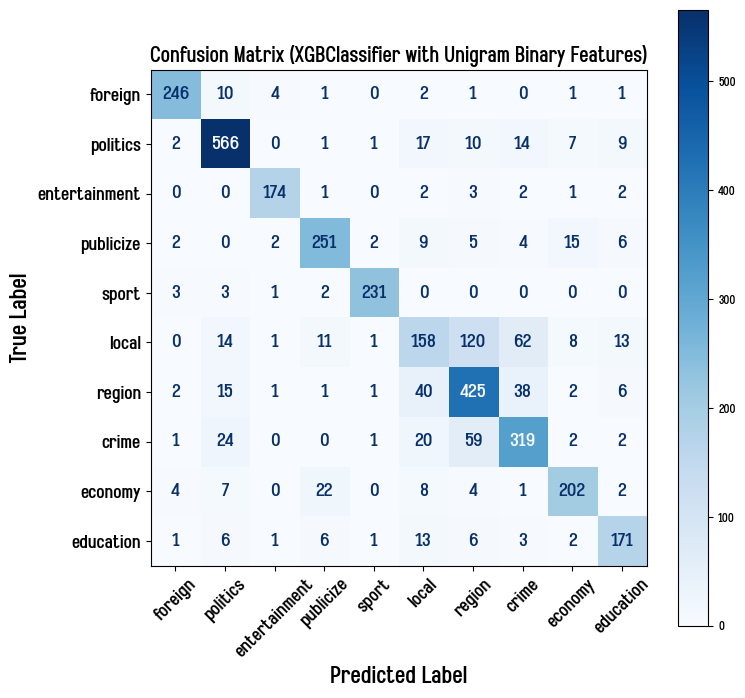

In [14]:
model_unigram_binary = train_predict(X_unigram_binary, show_confusion_matrix=True, 
                                    confusion_matrix_title='Confusion Matrix (XGBClassifier with Unigram Binary Features)',
                                    save_plot=True, plot_path='xgboost-unigram-binary',
                                    save_model=True, model_path='xgboost-unigram-binary')

               precision    recall  f1-score   support

      foreign       0.95      0.91      0.93       266
     politics       0.87      0.91      0.89       627
entertainment       0.93      0.92      0.93       185
    publicize       0.82      0.81      0.82       296
        sport       0.95      0.96      0.96       240
        local       0.57      0.37      0.45       388
       region       0.68      0.81      0.74       531
        crime       0.71      0.77      0.74       428
      economy       0.85      0.82      0.84       250
    education       0.82      0.79      0.80       210

     accuracy                           0.80      3421
    macro avg       0.82      0.81      0.81      3421
 weighted avg       0.79      0.80      0.79      3421



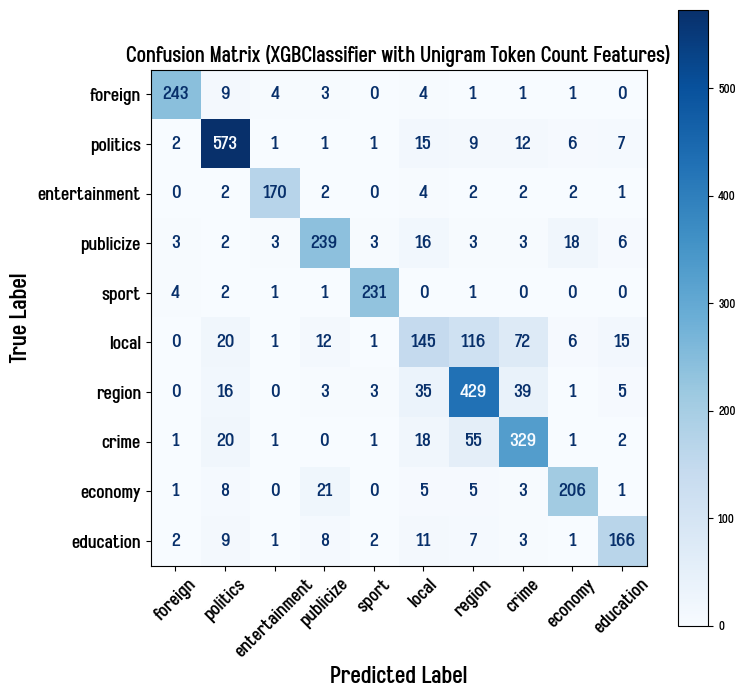

In [40]:
model_unigram_count = train_predict(X_unigram_count, show_confusion_matrix=True,
                                    confusion_matrix_title='Confusion Matrix (XGBClassifier with Unigram Token Count Features)',
                                    save_plot=True, plot_path='xgboost-unigram-token-count',
                                    save_model=True, model_path='xgboost-unigram-token-count')

               precision    recall  f1-score   support

      foreign       0.95      0.92      0.93       266
     politics       0.87      0.91      0.89       627
entertainment       0.94      0.92      0.93       185
    publicize       0.83      0.84      0.84       296
        sport       0.97      0.97      0.97       240
        local       0.60      0.39      0.47       388
       region       0.68      0.79      0.73       531
        crime       0.72      0.77      0.74       428
      economy       0.85      0.82      0.84       250
    education       0.82      0.85      0.83       210

     accuracy                           0.80      3421
    macro avg       0.82      0.82      0.82      3421
 weighted avg       0.80      0.80      0.80      3421



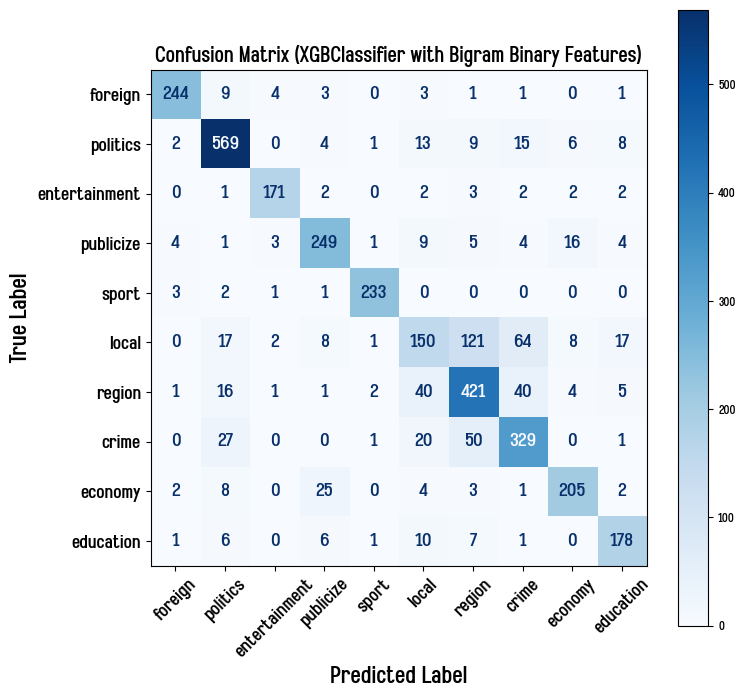

In [41]:
model_bigram_binary = train_predict(X_bigram_binary, show_confusion_matrix=True,
                                    confusion_matrix_title='Confusion Matrix (XGBClassifier with Bigram Binary Features)',
                                    save_plot=True, plot_path='xgboost-bigram-binary',
                                    save_model=True, model_path='xgboost-bigram-binary')

               precision    recall  f1-score   support

      foreign       0.95      0.91      0.93       266
     politics       0.88      0.91      0.89       627
entertainment       0.94      0.91      0.93       185
    publicize       0.84      0.83      0.84       296
        sport       0.95      0.97      0.96       240
        local       0.62      0.40      0.49       388
       region       0.68      0.79      0.73       531
        crime       0.71      0.77      0.74       428
      economy       0.83      0.84      0.83       250
    education       0.81      0.82      0.81       210

     accuracy                           0.80      3421
    macro avg       0.82      0.82      0.81      3421
 weighted avg       0.80      0.80      0.80      3421



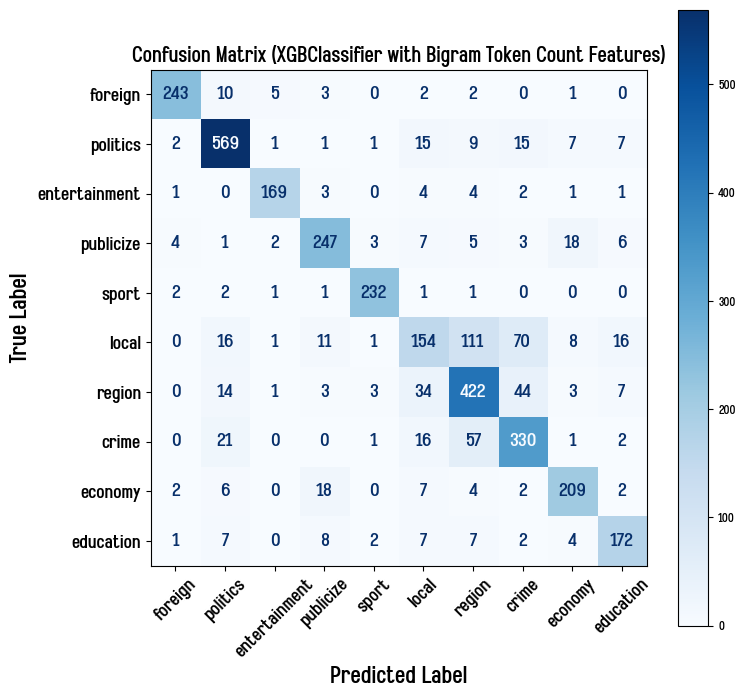

In [42]:
model_bigram_count = train_predict(X_bigram_count, show_confusion_matrix=True,
                                    confusion_matrix_title='Confusion Matrix (XGBClassifier with Bigram Token Count Features)',
                                    save_plot=True, plot_path='xgboost-bigram-token-count',
                                    save_model=True, model_path='xgboost-bigram-token-count')

## Model Evaluation <a id="eval"></a>
---

| Model                                      | Feature          | Note                         | Macro F1 score |
|--------------------------------------------|------------------|------------------------------|----------------|
| XGBoost | unigram          | binary count (0,1) featurization |      **0.82**     |
| XGBoost | unigram + bigram | binary count (0,1) featurization |      **0.82**      |
| XGBoost | unigram          | token count featurization        |      0.81      |
| XGBoost | unigram + bigram | token count featurization        |      0.81      |

If I need to choose one model, I will choose XGBoost with unigram binary-count featurization because this has the best macro f1 score and this is the leasted complicated and resource-dependent model. In other words, this model does not require much time to fit, comparing to one with unigram and bigram featurization.

---

Given that XGBoost with unigram binary features takes 39 seconds to train, and XGBoost with bigram binary features takes 13 minutes and 21 seconds to train.

How many times faster is XGBoost with unigram binary features than XGBoost with bigram binary features?

~~~python
# 13 minutes and 21 seconds = 801 seconds
np.round((13 * 60 + 21) / 39, 1)
>>> 20.5
~~~

XGBoost with unigram binary features is about **20.5** times faster than XGBoost with bigram binary features.

## Feature Importance

---

In [30]:
# get feature names
features = model_unigram_binary.named_steps['dv'].get_feature_names_out()
importances = model_unigram_binary.named_steps['xgboost'].feature_importances_
feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance'])
feature_importances_df.sort_values(by='importance', ascending=False).head(30)

,feature,importance
30050,คสช.,0.020598
53374,สำนักข่าว,0.013956
51517,ศึก,0.011568
47904,รัฐธรรมนูญ,0.011069
26941,การลงทุน,0.009033
42998,พ.ต.อ.,0.008539
43230,พรรคประชาธิปัตย์,0.008163
56940,อินสตาแกรม,0.007277
64145,แชมป์,0.006371
48730,ร่างรัฐธรรมนูญ,0.006181


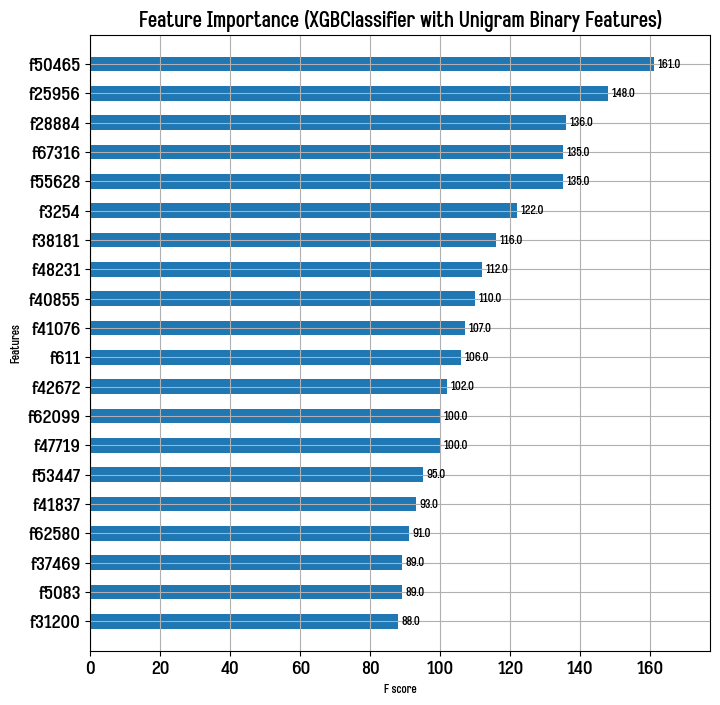

In [43]:
# inspect feature importance of XGBClassifier with Unigram Binary Features
fig, ax = plt.subplots(figsize=(8, 8))
plot_importance(model_unigram_binary.named_steps['xgboost'], ax=ax, height=0.5, max_num_features=20, importance_type='weight')
ax.set_title('Feature Importance (XGBClassifier with Unigram Binary Features)', fontdict={'fontsize': 18})
ax.tick_params(axis='both', which='major', labelsize=16)


* Write about feature importance